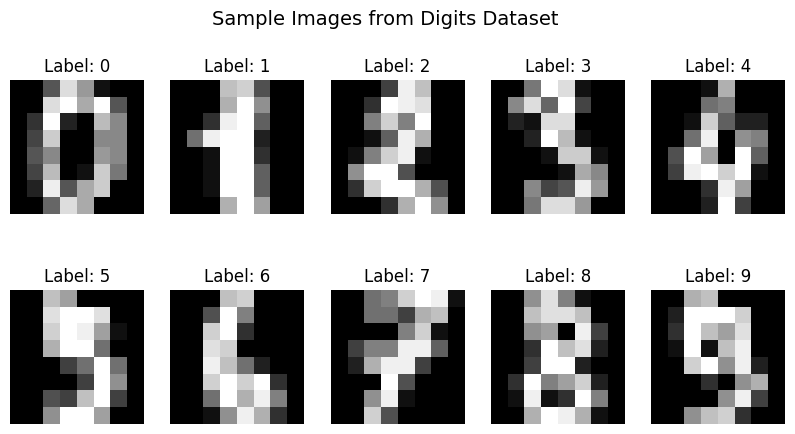

C:\Users\user\AppData\Local\Temp\ipykernel_17352\3936767124.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'Fold {i+1}' for i in range(len(scores))], y=scores, palette='viridis')


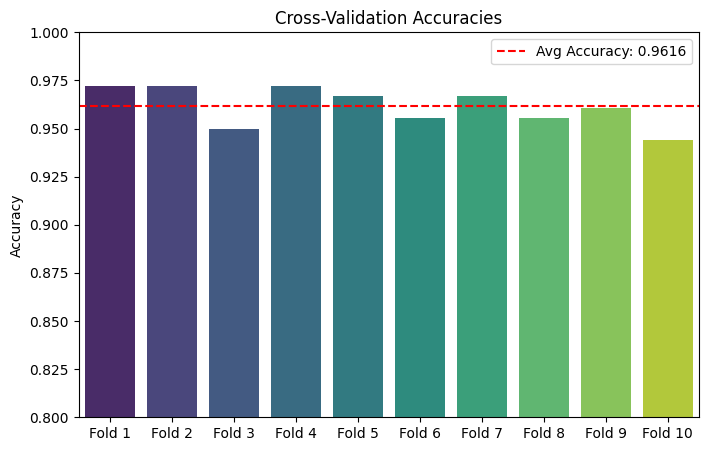

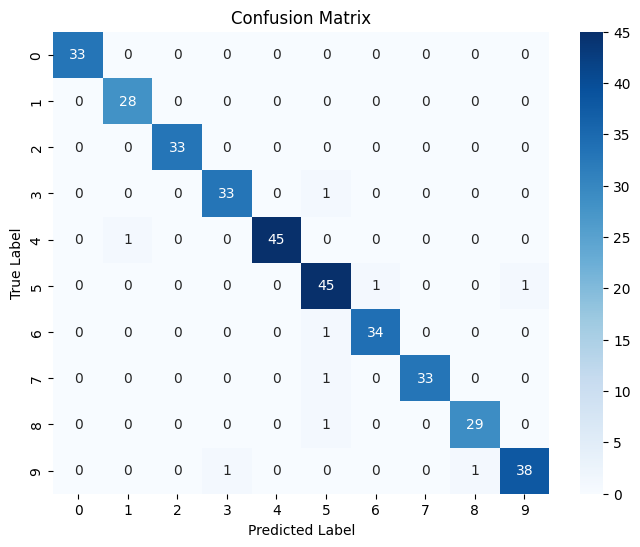

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target  # Features and target labels

# Visualize some sample digit images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.suptitle('Sample Images from Digits Dataset', fontsize=14)
plt.show()

# Define K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the model
model = LogisticRegression(max_iter=5000)  # High iteration to ensure convergence

# Perform Cross-Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'Fold {i+1}' for i in range(len(scores))], y=scores, palette='viridis')
plt.axhline(np.mean(scores), color='r', linestyle='--', label=f'Avg Accuracy: {np.mean(scores):.4f}')
plt.ylim(0.8, 1)  # Adjust y-axis for better visualization
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracies')
plt.legend()
plt.show()

# Train-Test Split for Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))
